<a href="https://colab.research.google.com/github/heloisebastos/Logica-Fuzzy-Classificacao-Qualidade-Ar/blob/main/Projeto__Sistema_Qualidade_Ar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Qualidade do Ar




In [14]:
!pip install -U scikit-fuzzy

Em seguida, importe as bibliotecas necessárias:


In [24]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import skfuzzy.control as ctrl


Crie as variáveis de entrada e saída fuzzy:

In [25]:
# Variáveis de entrada
material_particulado10 = ctrl.Antecedent(np.arange(0, 601, 1), 'material_particulado10')
material_particulado25 = ctrl.Antecedent(np.arange(0, 301, 1), 'material_particulado25')
ozonio = ctrl.Antecedent(np.arange(0, 801, 1), 'ozonio')
monoxido_carbono = ctrl.Antecedent(np.arange(0, 51, 1), 'monoxido_carbono')
dioxido_nitrogenio = ctrl.Antecedent(np.arange(0, 3751, 1), 'dioxido_nitrogenio')
dioxido_enxofre = ctrl.Antecedent(np.arange(0, 2621, 1), 'dioxido_enxofre')

# Variável de saída
qualidade_ar = ctrl.Consequent(np.arange(0, 401, 1), 'qualidade_ar', defuzzify_method='centroid')

Em seguida, vamos definir as funções de pertinência para cada variável fuzzy.


In [26]:
# Funções de pertinência para material_particulado10
material_particulado10['baixo'] = fuzz.trimf(material_particulado10.universe, [0, 50, 50])
material_particulado10['medio'] = fuzz.trimf(material_particulado10.universe, [50, 100, 100])
material_particulado10['elevado'] = fuzz.trimf(material_particulado10.universe, [100, 150, 150])
material_particulado10['alto'] = fuzz.trimf(material_particulado10.universe, [150, 250, 250])
material_particulado10['muito_alto'] = fuzz.trimf(material_particulado10.universe, [250, 600, 600])

# Funções de pertinência para material_particulado25
material_particulado25['baixo'] = fuzz.trimf(material_particulado25.universe, [0, 25, 25])
material_particulado25['medio'] = fuzz.trimf(material_particulado25.universe, [25, 50, 50])
material_particulado25['elevado'] = fuzz.trimf(material_particulado25.universe, [50, 75, 75])
material_particulado25['alto'] = fuzz.trimf(material_particulado25.universe, [75, 125, 125])
material_particulado25['muito_alto'] = fuzz.trimf(material_particulado25.universe, [125, 300, 300])

# Funções de pertinência para ozonio
ozonio['baixo'] = fuzz.trimf(ozonio.universe, [0, 100, 100])
ozonio['medio'] = fuzz.trimf(ozonio.universe, [100, 130, 130])
ozonio['elevado'] = fuzz.trimf(ozonio.universe, [130, 160, 160])
ozonio['alto'] = fuzz.trimf(ozonio.universe, [160, 200, 200])
ozonio['muito_alto'] = fuzz.trimf(ozonio.universe, [200, 800, 800])

# Funções de pertinência para monoxido_carbono
monoxido_carbono['baixo'] = fuzz.trimf(monoxido_carbono.universe, [0, 9, 9])
monoxido_carbono['medio'] = fuzz.trimf(monoxido_carbono.universe, [9, 11, 11])
monoxido_carbono['elevado'] = fuzz.trimf(monoxido_carbono.universe, [11, 13, 13])
monoxido_carbono['alto'] = fuzz.trimf(monoxido_carbono.universe, [13, 15, 15])
monoxido_carbono['muito_alto'] = fuzz.trimf(monoxido_carbono.universe, [15, 50, 50])

# Funções de pertinência para dioxido_nitrogenio
dioxido_nitrogenio['baixo'] = fuzz.trimf(dioxido_nitrogenio.universe, [0, 200, 200])
dioxido_nitrogenio['medio'] = fuzz.trimf(dioxido_nitrogenio.universe, [200, 240, 240])
dioxido_nitrogenio['elevado'] = fuzz.trimf(dioxido_nitrogenio.universe, [240, 320, 320])
dioxido_nitrogenio['alto'] = fuzz.trimf(dioxido_nitrogenio.universe, [320, 1130, 1130])
dioxido_nitrogenio['muito_alto'] = fuzz.trimf(dioxido_nitrogenio.universe, [1130, 3750, 3750])

# Funções de pertinência para dioxido_enxofre
dioxido_enxofre['baixo'] = fuzz.trimf(dioxido_enxofre.universe, [0, 20, 20])
dioxido_enxofre['medio'] = fuzz.trimf(dioxido_enxofre.universe, [20, 40, 40])
dioxido_enxofre['elevado'] = fuzz.trimf(dioxido_enxofre.universe, [40, 365, 365])
dioxido_enxofre['alto'] = fuzz.trimf(dioxido_enxofre.universe, [365, 800, 800])
dioxido_enxofre['muito_alto'] = fuzz.trimf(dioxido_enxofre.universe, [800, 2620, 2620])


# Funções de pertinência para qualidade_ar
qualidade_ar['boa'] = fuzz.trimf(qualidade_ar.universe, [0, 20, 40])
qualidade_ar['moderada'] = fuzz.trimf(qualidade_ar.universe, [40, 60, 80])
qualidade_ar['ruim'] = fuzz.trimf(qualidade_ar.universe, [80, 100, 120])
qualidade_ar['muito_ruim'] = fuzz.trimf(qualidade_ar.universe, [120, 160, 200])
qualidade_ar['pessima'] = fuzz.trimf(qualidade_ar.universe, [200, 400, 400])


Em seguida, vamos definir as regras fuzzy que governam o comportamento do sistema.




In [33]:

# # Regras para a qualidade do ar

regra1 = ctrl.Rule(material_particulado10['baixo'] & material_particulado25['baixo'] & ozonio['baixo'] & monoxido_carbono['baixo'] & dioxido_nitrogenio['baixo'] & dioxido_enxofre['baixo'], qualidade_ar['boa'])

regra2 = ctrl.Rule(material_particulado10['medio'] & material_particulado25['medio'] & ozonio['medio'] & monoxido_carbono['medio'] & dioxido_nitrogenio['medio'] & dioxido_enxofre['medio'], qualidade_ar['moderada'])

regra3 = ctrl.Rule(material_particulado10['elevado'] & material_particulado25['elevado'] & ozonio['elevado'] & monoxido_carbono['elevado'] & dioxido_nitrogenio['elevado'] & dioxido_enxofre['elevado'], qualidade_ar['ruim'])

regra4 = ctrl.Rule(material_particulado10['alto'] & material_particulado25['alto'] & ozonio['alto'] & monoxido_carbono['alto'] & dioxido_nitrogenio['alto'] & dioxido_enxofre['alto'], qualidade_ar['muito_ruim'])

regra5 = ctrl.Rule(material_particulado10['muito_alto'] & material_particulado25['muito_alto'] & ozonio['muito_alto'] & monoxido_carbono['muito_alto'] & dioxido_nitrogenio['muito_alto'] & dioxido_enxofre['muito_alto'], qualidade_ar['pessima'])

regra6 = ctrl.Rule(material_particulado10['baixo'] & material_particulado25['medio'] & ozonio['elevado'] & monoxido_carbono['medio'] & dioxido_nitrogenio['medio'] & dioxido_enxofre['elevado'], qualidade_ar['moderada'])

regra7 = ctrl.Rule(material_particulado10['medio'] & material_particulado25['elevado'] & ozonio['alto'] & monoxido_carbono['medio'] & dioxido_nitrogenio['alto'] & dioxido_enxofre['alto'], qualidade_ar['ruim'])

regra8 = ctrl.Rule(material_particulado10['elevado'] & material_particulado25['medio'] & ozonio['medio'] & monoxido_carbono['elevado'] & dioxido_nitrogenio['medio'] & dioxido_enxofre['alto'], qualidade_ar['muito_ruim'])

regra9 = ctrl.Rule(material_particulado10['alto'] & material_particulado25['medio'] & ozonio['baixo'] & monoxido_carbono['elevado'] & dioxido_nitrogenio['alto'] & dioxido_enxofre['muito_alto'], qualidade_ar['pessima'])

regra10 = ctrl.Rule(material_particulado10['baixo'] & material_particulado25['medio'] & ozonio['elevado'] & monoxido_carbono['baixo'] & dioxido_nitrogenio['alto'] & dioxido_enxofre['elevado'], qualidade_ar['moderada'])

regra11 = ctrl.Rule(material_particulado10['medio'] & material_particulado25['elevado'] & ozonio['baixo'] & monoxido_carbono['elevado'] & dioxido_nitrogenio['medio'] & dioxido_enxofre['elevado'], qualidade_ar['ruim'])

regra12 = ctrl.Rule(material_particulado10['muito_alto'] & material_particulado25['medio'] & ozonio['alto'] & monoxido_carbono['elevado'] & dioxido_nitrogenio['alto'] & dioxido_enxofre['alto'], qualidade_ar['pessima'])

regra13 = ctrl.Rule(material_particulado10['baixo'] & material_particulado25['baixo'] & ozonio['medio'] & monoxido_carbono['baixo'] & dioxido_nitrogenio['baixo'] & dioxido_enxofre['medio'], qualidade_ar['boa'])

regra14 = ctrl.Rule(material_particulado10['medio'] & material_particulado25['elevado'] & ozonio['medio'] & monoxido_carbono['baixo'] & dioxido_nitrogenio['baixo'] & dioxido_enxofre['baixo'], qualidade_ar['moderada'])

regra15 = ctrl.Rule(material_particulado10['alto'] & material_particulado25['alto'] & ozonio['elevado'] & monoxido_carbono['medio'] & dioxido_nitrogenio['elevado'] & dioxido_enxofre['alto'], qualidade_ar['muito_ruim'])

regra16 = ctrl.Rule(material_particulado10['baixo'] & material_particulado25['baixo'] & ozonio['elevado'] & monoxido_carbono['alto'] & dioxido_nitrogenio['elevado'] & dioxido_enxofre['medio'], qualidade_ar['ruim'])

regra17 = ctrl.Rule(material_particulado10['medio'] & material_particulado25['elevado'] & ozonio['alto'] & monoxido_carbono['baixo'] & dioxido_nitrogenio['medio'] & dioxido_enxofre['baixo'], qualidade_ar['moderada'])

regra18 = ctrl.Rule(material_particulado10['alto'] & material_particulado25['muito_alto'] & ozonio['medio'] & monoxido_carbono['baixo'] & dioxido_nitrogenio['elevado'] & dioxido_enxofre['muito_alto'], qualidade_ar['pessima'])

regra19 = ctrl.Rule(material_particulado10['muito_alto'] & material_particulado25['elevado'] & ozonio['medio'] & monoxido_carbono['baixo'] & dioxido_nitrogenio['medio'] & dioxido_enxofre['alto'], qualidade_ar['muito_ruim'])

regra20 = ctrl.Rule(material_particulado10['baixo'] & material_particulado25['baixo'] & ozonio['medio'] & monoxido_carbono['baixo'] & dioxido_nitrogenio['baixo'] & dioxido_enxofre['baixo'], qualidade_ar['boa'])


regra21 = ctrl.Rule(material_particulado10['elevado'] & material_particulado25['medio'] & ozonio['medio'] & monoxido_carbono['alto'] & dioxido_nitrogenio['alto'] & dioxido_enxofre['elevado'], qualidade_ar['muito_ruim'])

regra22 = ctrl.Rule(material_particulado10['medio'] & material_particulado25['medio'] & ozonio['elevado'] & monoxido_carbono['medio'] & dioxido_nitrogenio['elevado'] & dioxido_enxofre['medio'], qualidade_ar['ruim'])

regra23 = ctrl.Rule(material_particulado10['baixo'] & material_particulado25['elevado'] & ozonio['medio'] & monoxido_carbono['baixo'] & dioxido_nitrogenio['baixo'] & dioxido_enxofre['medio'], qualidade_ar['moderada'])

regra24 = ctrl.Rule(material_particulado10['medio'] & material_particulado25['baixo'] & ozonio['medio'] & monoxido_carbono['medio'] & dioxido_nitrogenio['elevado'] & dioxido_enxofre['medio'], qualidade_ar['moderada'])

regra25 = ctrl.Rule(material_particulado10['elevado'] & material_particulado25['alto'] & ozonio['baixo'] & monoxido_carbono['elevado'] & dioxido_nitrogenio['medio'] & dioxido_enxofre['alto'], qualidade_ar['ruim'])

regra26 = ctrl.Rule(material_particulado10['alto'] & material_particulado25['medio'] & ozonio['muito_alto'] & monoxido_carbono['medio'] & dioxido_nitrogenio['elevado'] & dioxido_enxofre['medio'], qualidade_ar['muito_ruim'])

regra27 = ctrl.Rule(material_particulado10['baixo'] & material_particulado25['medio'] & ozonio['baixo'] & monoxido_carbono['medio'] & dioxido_nitrogenio['baixo'] & dioxido_enxofre['medio'], qualidade_ar['boa'])

regra28 = ctrl.Rule(material_particulado10['medio'] & material_particulado25['medio'] & ozonio['medio'] & monoxido_carbono['elevado'] & dioxido_nitrogenio['medio'] & dioxido_enxofre['alto'], qualidade_ar['ruim'])

regra29 = ctrl.Rule(material_particulado10['elevado'] & material_particulado25['baixo'] & ozonio['medio'] & monoxido_carbono['elevado'] & dioxido_nitrogenio['alto'] & dioxido_enxofre['medio'], qualidade_ar['muito_ruim'])

regra30 = ctrl.Rule(material_particulado10['medio'] & material_particulado25['baixo'] & ozonio['medio'] & monoxido_carbono['baixo'] & dioxido_nitrogenio['medio'] & dioxido_enxofre['baixo'], qualidade_ar['moderada'])


In [34]:
sistema = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9,
                              regra10, regra11, regra12, regra13, regra14, regra15, regra16, regra17, regra18, regra19, regra20,
                              regra21, regra22, regra23, regra24, regra25, regra26, regra27, regra28, regra29, regra30])


simulador = ctrl.ControlSystemSimulation(sistema)

simulador.input['material_particulado10'] = 55
simulador.input['material_particulado25'] = 26
simulador.input['ozonio'] = 110
simulador.input['monoxido_carbono'] = 10
simulador.input['dioxido_nitrogenio'] = 235
simulador.input['dioxido_enxofre'] = 22

simulador.compute()

print(simulador.output['qualidade_ar'])

59.999999999999964


In [35]:
# Computar a saída fuzzy
simulador.compute()

# Obtem o valor da qualidade
indice_qualidade_ar = simulador.output['qualidade_ar']

print("indice da qualidade do ar : ", indice_qualidade_ar )


indice da qualidade do ar :  59.999999999999964


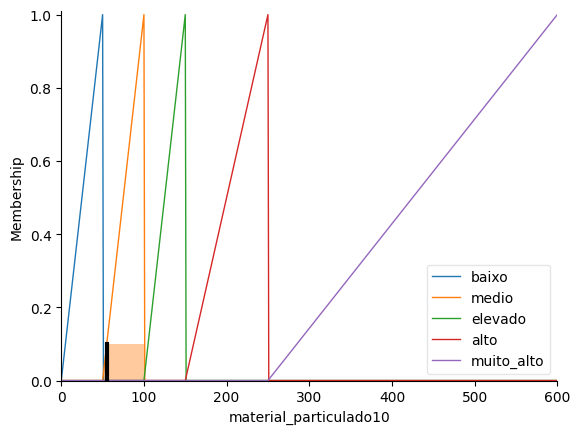

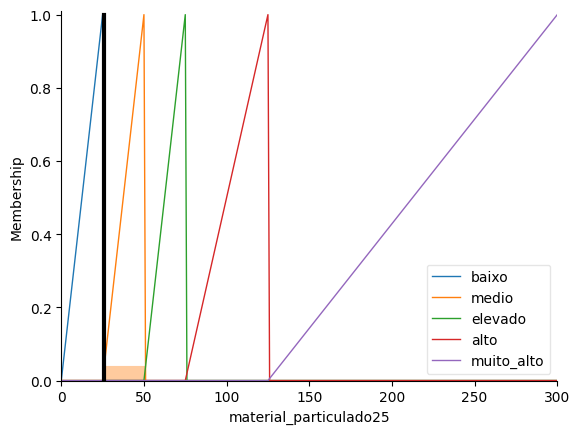

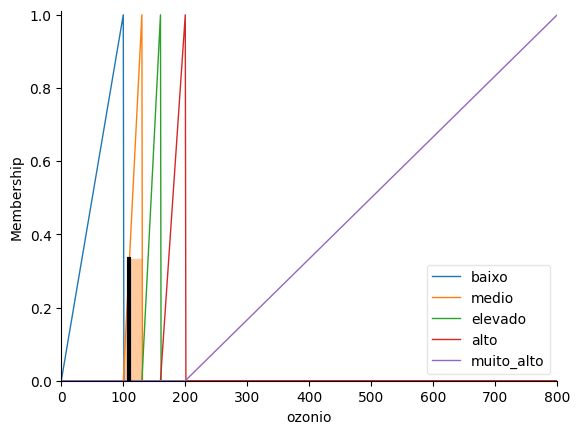

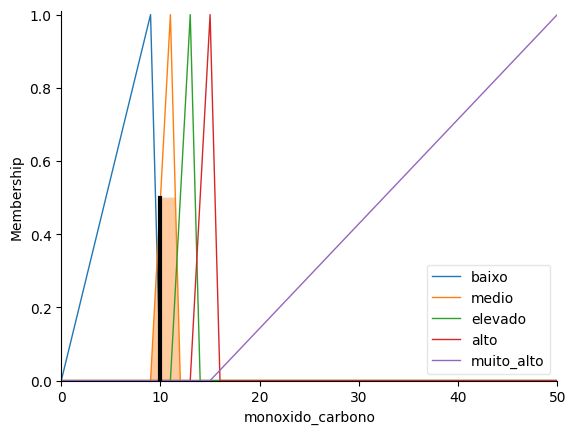

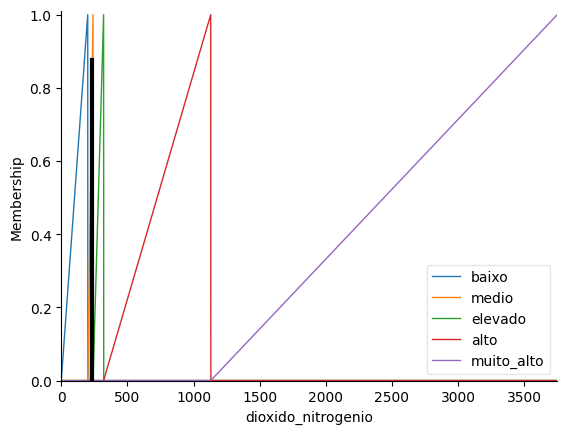

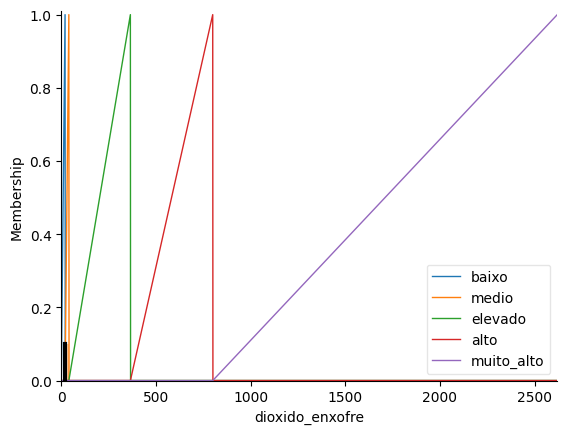

In [36]:
 # Plotando os gráficos das funções de pertinência e do resultado
material_particulado10.view(simulador)
material_particulado25.view(simulador)
ozonio.view(simulador)
monoxido_carbono.view(simulador)
dioxido_nitrogenio.view(simulador)
dioxido_enxofre.view(simulador)

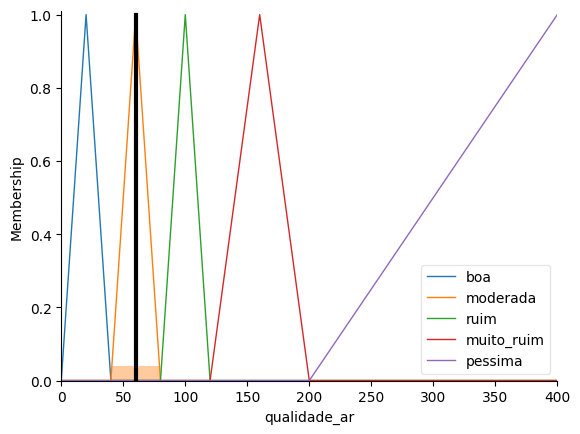

In [37]:
qualidade_ar.view(simulador)

In [38]:
sistema = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9,
                              regra10, regra11, regra12, regra13, regra14, regra15, regra16, regra17, regra18, regra19, regra20,
                              regra21, regra22, regra23, regra24, regra25, regra26, regra27, regra28, regra29, regra30])


simulador = ctrl.ControlSystemSimulation(sistema)

simulador.input['material_particulado10'] = 42
simulador.input['material_particulado25'] = 24
simulador.input['ozonio'] = 90
simulador.input['monoxido_carbono'] = 8
simulador.input['dioxido_nitrogenio'] = 194
simulador.input['dioxido_enxofre'] = 15

simulador.compute()

print(simulador.output['qualidade_ar'])

20.000000000000004


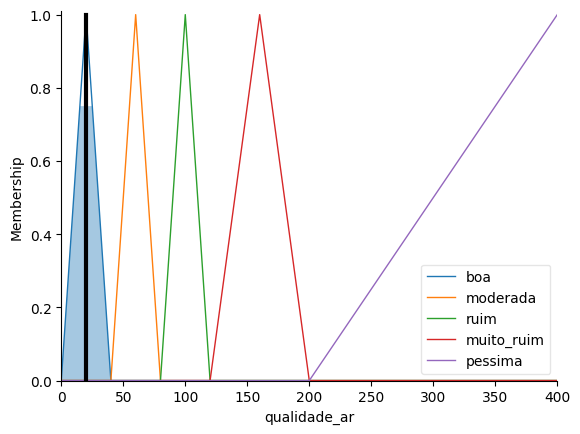

In [39]:
qualidade_ar.view(simulador)

311.2285174693112


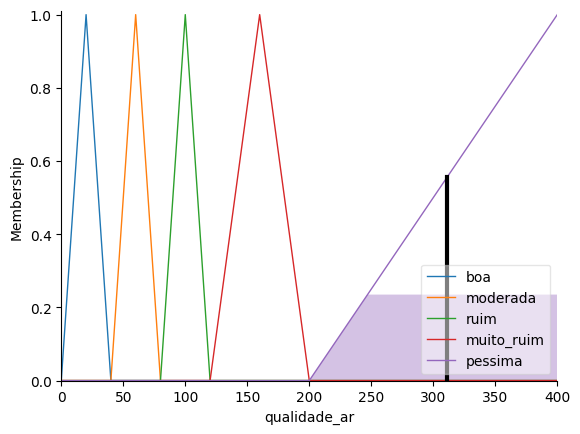

In [40]:
sistema = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9,
                              regra10, regra11, regra12, regra13, regra14, regra15, regra16, regra17, regra18, regra19, regra20,
                              regra21, regra22, regra23, regra24, regra25, regra26, regra27, regra28, regra29, regra30])


simulador = ctrl.ControlSystemSimulation(sistema)

simulador.input['material_particulado10'] = 547
simulador.input['material_particulado25'] = 244
simulador.input['ozonio'] = 341
simulador.input['monoxido_carbono'] = 29
simulador.input['dioxido_nitrogenio'] = 2589
simulador.input['dioxido_enxofre'] = 1854

simulador.compute()

print(simulador.output['qualidade_ar'])

qualidade_ar.view(simulador)